In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/sample_data/Titanic-Dataset.csv")

print("First 5 rows:")
print(df.head())
print("\nData types & null values:")
print(df.info())
print("\nMissing values per column:")
print(df.isnull().sum())


First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN

In [13]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-2359842934.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-2359842934.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

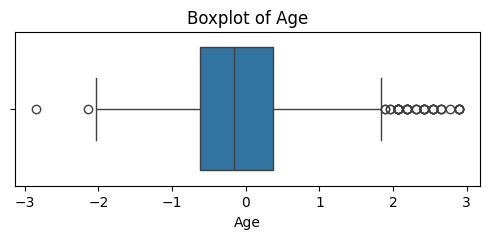

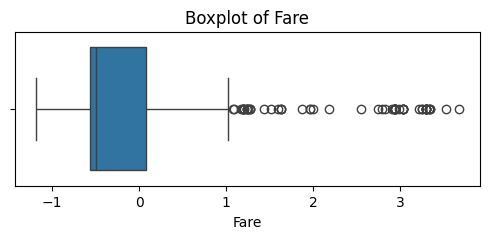

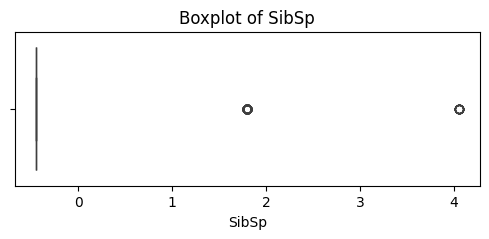

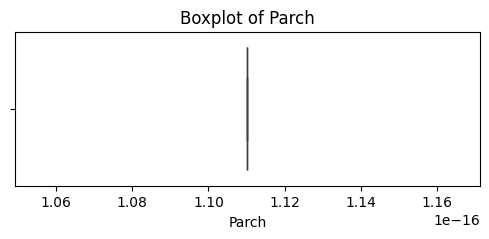


Data after cleaning and preprocessing:
    PassengerId  Survived  Pclass                                  Name  \
2             3         1       3                Heikkinen, Miss. Laina   
4             5         0       3              Allen, Mr. William Henry   
5             6         0       3                      Moran, Mr. James   
12           13         0       3        Saundercock, Mr. William Henry   
14           15         0       3  Vestrom, Miss. Hulda Amanda Adolfina   

       Sex       Age     SibSp         Parch            Ticket      Fare  \
2   female -0.386610 -0.448235  1.110223e-16  STON/O2. 3101282 -0.555858   
4     male  0.666730 -0.448235  1.110223e-16            373450 -0.545934   
5     male -0.152535 -0.448235  1.110223e-16            330877 -0.513517   
12    male -1.088837 -0.448235  1.110223e-16         A/5. 2151 -0.545934   
14  female -1.791063 -0.448235  1.110223e-16            350406 -0.561479   

   Embarked  
2         S  
4         S  
5         

In [15]:
for col in numerical_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Remove outliers using IQR method
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

print("\nData after cleaning and preprocessing:")
print(df.head())